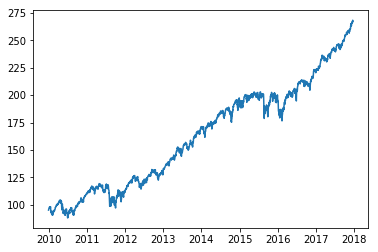

In [5]:
#import pandas.io.data as web

import pandas_datareader as web
import datetime
from numpy import *
from pylab import plot, show

start = datetime.datetime(1993, 1, 1)
end = datetime.datetime(2016, 12, 31)
spy = web.DataReader("SPY", 'yahoo', start, end)

spy = pdr.get_data_yahoo('SPY')

closes = spy['Adj Close'][:]
plot(closes); show()

In [4]:
import pandas_datareader as pdr
print(pdr.__version__)  # Make sure it is '0.4.1'.

0.5.0


In [10]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,95.218681,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.833588,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,97.089912,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,97.158264,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,97.568398,131091100


<IPython.core.display.Javascript object>


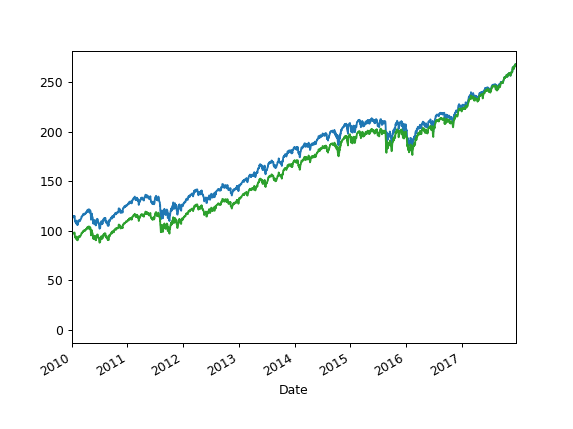

In [15]:
%matplotlib notebook

spy["Close"].plot()

In [16]:
# calculate Hurst
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(closes[lag:], closes[:-lag]))) for lag in lags]

plot(log(lags), log(tau)); show()

m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print('hurst = ',hurst)

hurst =  0.427153675829


In [17]:
# recent prices
closes_recent = spy['Adj Close'][-2000:]
plot(closes_recent); show()

# calculate Hurst of recent prices
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(closes_recent[lag:], closes_recent[:-lag]))) for lag in lags]

plot(log(lags), log(tau)); show()

m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print('hurst = ',hurst)

hurst =  0.42535236833
